
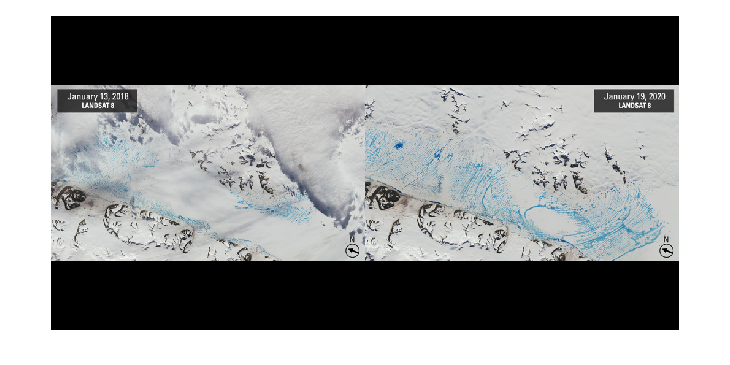

In [1]:
img1 = imread("1_SnowPoolsBefore_20180113_md-2048px.jpg");
img2 = imread("2_SnowPoolsAfter_20200119_md-2048px.jpg");
montage({img1, img2}, 'ThumbnailSize', [512 512]);

In [2]:

function [BW,maskedRGBImage] = segmentMeltwater(RGB)
%createMask  Threshold RGB image using auto-generated code from colorThresholder app.
%  [BW,MASKEDRGBIMAGE] = createMask(RGB) thresholds image RGB using
%  auto-generated code from the colorThresholder app. The colorspace and
%  range for each channel of the colorspace were set within the app. The
%  segmentation mask is returned in BW, and a composite of the mask and
%  original RGB images is returned in maskedRGBImage.

% Auto-generated by colorThresholder app on 08-May-2025
%------------------------------------------------------

% Convert RGB image to chosen color space
I = rgb2hsv(RGB);

% Define thresholds for channel 1 based on histogram settings
channel1Min = 0.269;
channel1Max = 0.800;

% Define thresholds for channel 2 based on histogram settings
channel2Min = 0.118;
channel2Max = 0.590;

% Define thresholds for channel 3 based on histogram settings
channel3Min = 0.626;
channel3Max = 0.915;

% Create mask based on chosen histogram thresholds
sliderBW = (I(:,:,1) >= channel1Min ) & (I(:,:,1) <= channel1Max) & ...
    (I(:,:,2) >= channel2Min ) & (I(:,:,2) <= channel2Max) & ...
    (I(:,:,3) >= channel3Min ) & (I(:,:,3) <= channel3Max);
BW = sliderBW;

% Initialize output masked image based on input image.
maskedRGBImage = RGB;

% Set background pixels where BW is false to zero.
maskedRGBImage(repmat(~BW,[1 1 3])) = 0;

end



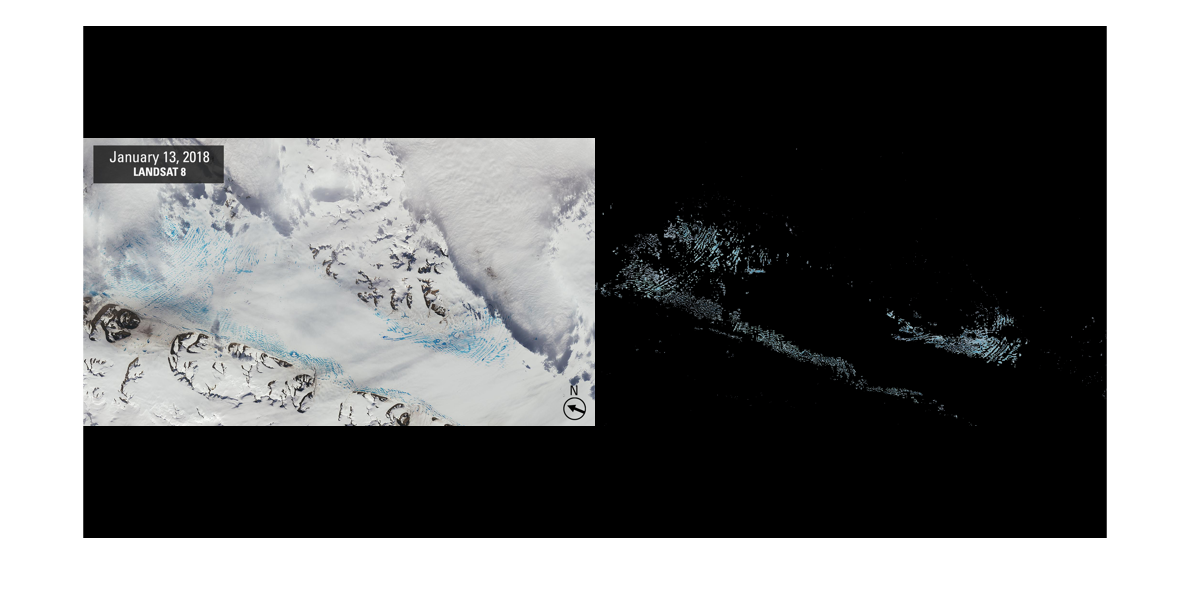

In [3]:
[BW1, maskedImg1] = segmentMeltwater(img1);
[BW2, maskedImg2] = segmentMeltwater(img2);
figure
montage({img1, maskedImg1}, ThumbnailSize=[512, 512])


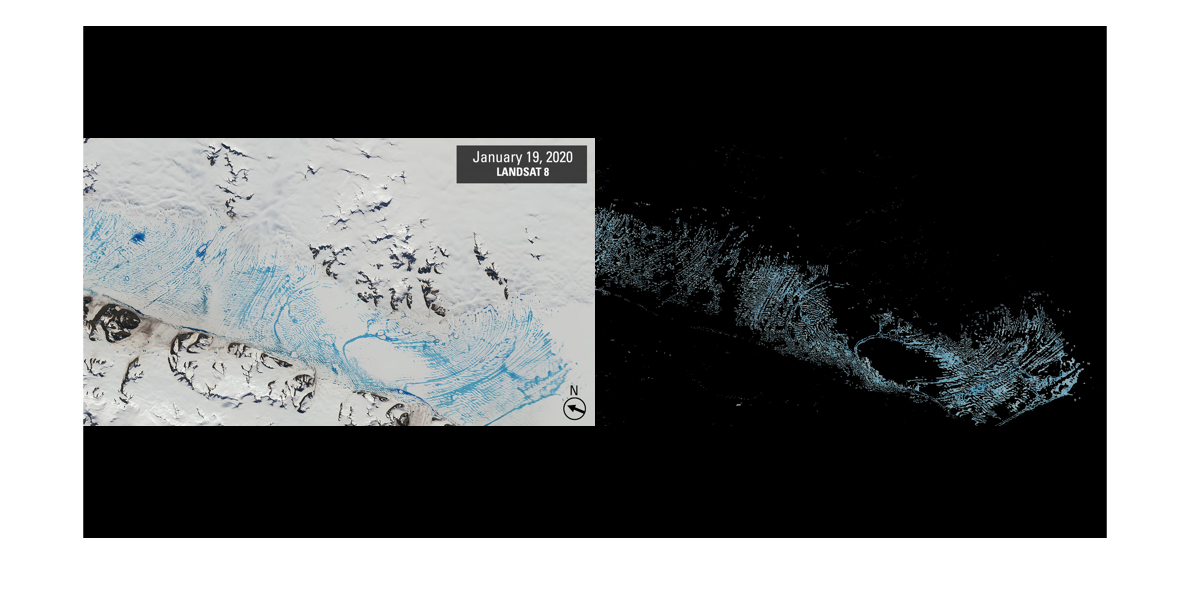

In [4]:
figure
montage({img2, maskedImg2}, ThumbnailSize=[512, 512])

In [5]:
(nnz(BW2) - nnz(BW1)) / nnz(BW1) * 100

ans = 172.5109


The water increase is 172% than before..

